# 数据预处理、降维、特征提取及聚类

<font color="blue">作者：欧新宇（Xinyu OU）</font>

<font color="red">本文档所展示的测试结果，均运行于：Intel Core i7-7700K CPU 4.2GHz</font>

# 一、数据预处理

想象以下两个场景：

**场景一：**

我们正在通过一台高清电视而非现场看世界杯足球赛，在电视的纯平显示器上有一个漂亮的足球。在4K的显示器上大概包含了880万像素，而足球则可能是由较少的像素组成，比如说只有1000个像素。在大部分的体育比赛中，我们关注的是给定时刻球的位置。人的大脑想要了解比赛的进展，就需要了解球在运动场中的位置。对于人来说，这一切显得十分的自然，甚至不需要做任何的思考。在这个场景中，人们的大脑会自动地将显示器上数百万的像素转换为一个三维的图像，球就落在这个三维图像的中心，而且其他的区域会被大脑自然虚化，甚至`隐藏`(这就是传说中的绝技：我的眼里只有你）。该图像给出了运动场上球的位置。**在这个过程中，人的大脑已经自动地将数据从一百万维降至了三维(x,y,z三个轴方向)。**

<font color='blue'>在上述比赛的例子中，人们面对的原本是百万像素的数据，但是只有球的三维位置才是最重要的，这就称为**降维（Dimensional Reduction）**。降维的目的是为了简化计算。和人一样，对于计算机来说，更简单的数据更便于计算.</font>

**场景二：**

假设我们正在玩一款游戏，比如: `王者荣耀`或者`暗黑破坏神III`. 你的人物是一个70级的魔法师，你的血量是56000点，魔法值：54800，力量780，敏捷890，火焰抗性：56%，雷电抗性：21%，身上全套橙色塔拉夏套装，镶嵌了5个红色宝石，3个绿色宝石，4个紫色宝石，最后有一个70级的圣殿骑士的护卫。那么，如果你有一个对手，他是69级的猎魔师，血量是60000点，魔法值：14480，敏捷19040，力量3400，火焰抗性：26%，雷电抗性：45%，身上全套橙色掠夺套装，镶嵌了4个红色宝石，2个绿色宝石，9个紫色宝石，最后有一个70级的魔女护卫。
好了，请问你和这个对手进行PK，你的胜率是多少？

<font color='red'>惨了，基本上没法进行进行比较，是吧？</font> 

设想一下，如果我们将所有属性都转换为$\{0 - 1\}$之间的一个数值，并将每个属性按照重要程度给定一个权重值。这样，我们可以将每个人的能力用线性公式来表示：

$f(x) = w[0]*x[0] + w[1]*x[1] + ... + w[n]*x[n]$

如此，双方的能力就可以用数值计算出来。如此，就可以直接对比双方的能力了。

*Maybe还要加上一个约束项，用来表示双方的`操控能力`，不过这不在本节课的讨论范围中，我们暂时将其省略。*

<font color='blue'>在这个例子中，我们将不同参照系的数值进行了调整，将它们约束到同一个维度上来进行比较和计算，这种方法称为**归一化、正则化（Normalization）**。归一化的目的是为了让无法计算和比较的特征可以被计算。</font>

下面，我们将从`数据预处理`和`归一化`的角度来进行介绍。

## 1. 数据预处理（归一化、正则化）

数据集的**标准化**对scikit-learn中实现的大多数机器学习算法来说是常见的要求。如果个别特征或多或少看起来不是很像标准正态分布(具有零均值和单位方差)，那么它们的表现力可能会较差。

**事实上，不仅仅是机器学习，在各种深度学习的算法中，零均值和单位方差也能有效提高整体系统的性能。**

在实际情况中,我们经常忽略特征的分布形状，直接经过去均值来对某个特征进行中心化，再通过除以非常量特征(non-constant features)的标准差进行缩放。

例如，在机器学习算法的目标函数(例如SVM的RBF内核或线性模型的l1和l2正则化)，许多学习算法中目标函数的基础都是假设所有的特征都是零均值并且具有同一阶数上的方差。如果某个特征的方差比其他特征大几个数量级，那么它就会在学习算法中占据主导位置，导致学习器并不能像我们说期望的那样，从其他特征中学习。

### 1.0 生成初始数据

训练集特征一的最大值：6.52， 最小值：-10.49。
训练集特征二的最大值：-0.39， 最小值：-10.19。
测试集特征一的最大值：2.83， 最小值：-8.65。
测试集特征二的最大值：2.86， 最小值：-13.06。


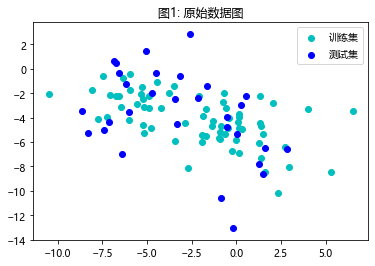

test


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
# 从模型选择子库中导入数据集拆分工具
from sklearn.model_selection import train_test_split

X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=50, cluster_std=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8, train_size = 0.7)

# 给出样本两个特征的极值
print("训练集特征一的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X_train[:,0]), np.min(X_train[:,0])))
print("训练集特征二的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X_train[:,1]), np.min(X_train[:,1])))
print("测试集特征一的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X_test[:,0]), np.min(X_test[:,0])))
print("测试集特征二的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X_test[:,1]), np.min(X_test[:,1])))
# 绘制样本的散点图
plt.scatter(X_train[:,0], X_train[:,1], c='c', cmap=plt.cm.cool, label='训练集')
plt.scatter(X_test[:,0], X_test[:,1], c='b', cmap=plt.cm.cool, label='测试集')
plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']
plt.title('图1: 原始数据图')
plt.legend()
plt.show()

print("test")

### 1.1 StandardScaler (Z-Score)

`StandardScaler` 提供了一种将数据进行`归一化`和`标准化`的操作，它能够按照输入数据构建一个均值为0，方差为1的归一化器，并用这个归一化器实现对训练集数据和测试集数据的归一化处理。这种归一化操作，我们通常称之为**Z-Score**。

具体而言，它会对每个特征/按列分别进行处理，先**去均值**，再**除以方差**。最后生成的数据都会聚集在0附近，方差为1。归一化后的数据可正可负，但一般绝对值都不会太大。

`StandardScaler`方法可以公式化为：

$X = (x - \mu)/ \sigma$

其中， $\mu$ 表示某一列特征的均值 $mean(x_n)$，$\sigma$ 表示这一列特征的方差。

在sklearn工具包中的preprocessing类中，每种预处理的方法，一般来说都有三种方法，包括：
- .fit(): 用于计算训练集train_x的均值、方差、最大值、最小值等训练集固有的属性。
- .transform(): 用于在fit()的基础上对指定的数据集（训练集、测试集、验证机）进行标准化、降维、归一化等变换。
- .fit_transform()：整合fit()和transform()，同时实现属性学习和变换，该函数仅仅为了简化操作。

所以，一般的操作流程如下：

```python

TODO: 标准步骤
# 1. 设置某种预处理方法
scaler = method() 
# 2. 使用训练数据来获取训练集的固有属性
scaler.fit(x_train) 
# 3. 应用到训练集、测试集和验证集
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_val_scaled = scaler.transform(x_val)

TODO: 第一种简化方法
# 其中第1.2步可以简化为：
scaler = method().fit(X_train)

TODO: 第二种简化方法
# 为了简化操作，可以将第以上操作简化为：
# 1. 设置某种预处理方法
scaler = method() 
# 2. 使用训练数据来获取训练集的固有属性，并应用到训练集
x_train_scaled = scaler.fit_transform(x_train) 
# 3. 应用到训练集、测试集和验证集
x_test_scaled = scaler.transform(x_test)
x_val_scaled = scaler.transform(x_val)

```

> <font color="blue">为什么要用训练集来学习（获取）数据集的固有属性呢？</font>

> 因为：    
> 1. 在实际环境中，通常只有训练集是我们已知的    
> 2. 训练集的数据通常足够反映整个数据集的特征    
> 3. 对于一个数据集（真实环境），为了预测准确，我们要求`待处理样本`应该和`训练样本`具有相同的处理方法

- 下面给出例子

训练集特征一的最大值：2.50， 最小值：-2.38。
训练集特征二的最大值：1.82， 最小值：-2.96。
测试集特征一的最大值：1.44， 最小值：-1.85。
测试集特征二的最大值：3.41， 最小值：-4.36。


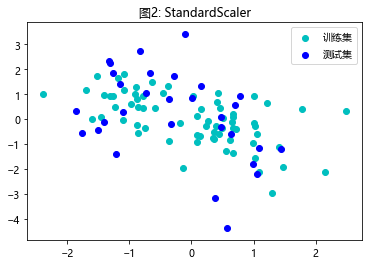

In [16]:
# 导入StandardScaler预处理器
from sklearn import preprocessing
# 使用StandardScaler对样本的特征X进行数据预处理
scaler1 = preprocessing.StandardScaler().fit(X_train)
X1_train = scaler1.transform(X_train)
X1_test = scaler1.transform(X_test)

# 给出样本两个特征的极值
print("训练集特征一的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X1_train[:,0]), np.min(X1_train[:,0])))
print("训练集特征二的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X1_train[:,1]), np.min(X1_train[:,1])))
print("测试集特征一的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X1_test[:,0]), np.min(X1_test[:,0])))
print("测试集特征二的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X1_test[:,1]), np.min(X1_test[:,1])))
# 绘制样本的散点图
plt.scatter(X1_train[:,0], X1_train[:,1], c='c', cmap=plt.cm.cool, label='训练集')
plt.scatter(X1_test[:,0], X1_test[:,1], c='b', cmap=plt.cm.cool, label='测试集')
plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']
plt.title('图2: StandardScaler')
plt.legend()
plt.show()

**【结果分析】**

对比图1和图2，散点的位置和相关关系完全一样，所不同的只是坐标轴的刻度范围。这说明`StandardScaler`只是将特征的均值设置为0，方差设置为1，而没有修改样本特征的相对关系，这可以确保样本在`"零均值"`的维度上具有等价性，利于模型的训练。

- 查看正则化器

In [17]:
print(scaler1)

StandardScaler(copy=True, with_mean=True, with_std=True)


    - with_mean: 是否执行去均值操作，当with_mean=False将关闭去均值操作
    - with_std: 是否执行除方差操作

- 查看正则化器中获取到的均值

In [18]:
scaler1.mean_

array([-2.18124455, -4.12294511])

- 查看正则化器中获取到的方差

此处计算的是每个特征的缩放尺度，即方差$\sigma$，计算方法是np.sqrt(var_).


In [19]:
scaler1.scale_

array([3.48646681, 2.04702194])

### 1.2 MinMaxScaler

利用`MinMaxScaler`进行的归一化是一种线性归一化方法，通常不会对数据分布产生影响，它们将特征缩放到给定的最小值和最大值之间。对于 `MinMaxScaler`  来说，通常有两种处理方法：
1. 将特征规范化到0和1之间，即将特征的最大绝对值定义为单位大小，其他特征值以单位大小进行缩放
2. 将特征规范化到min和max之间，即将特征的最大值定义为max，特征的最小值定义为min，其他特征值以单位大小进行缩放

如果最大值或最小值不稳定的话，经过`MinMaxScaler`处理的数据结果可能会因此而变得不稳定。但是，对于图像数据，由于像素值范围是[0,255]，因此MinMaxScaler类通常在图像处理上比较有效。

默认情况下，我们可以使用 `MinMaxScaler(X)` 将特征约束到[0,1]之间。当给 `MinMaxScaler` 提供一个明确的 feature_range=(min, max)时，即：scaler = MinMaxScaler(feature_range=(min, max))，它完整的数学表达是:
```
X_std = (X - X.min)) / (X.max - X.min)
X_scaled = X_std * (max - min) + min
```

事实上，对于默认约束到[0, 1]的操作，我们可以定义：MinMaxScaler(feature_range=(0, 1)).

- 下面给出 `MinMaxScaler`  的例子

In [1]:
# 导入MinMaxScaler预处理器
from sklearn import preprocessing
# 使用MinMaxScaler对样本的特征X进行数据预处理
scaler2 = preprocessing.MinMaxScaler().fit(X_train)
X2_train = scaler2.transform(X_train)
X2_test = scaler2.transform(X_test)

# 给出样本两个特征的极值
print("训练集特征一的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X2_train[:,0]), np.min(X2_train[:,0])))
print("训练集特征二的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X2_train[:,1]), np.min(X2_train[:,1])))
print("测试集特征一的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X2_test[:,0]), np.min(X2_test[:,0])))
print("测试集特征二的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X2_test[:,1]), np.min(X2_test[:,1])))
# 绘制样本的散点图
plt.scatter(X2_train[:,0], X2_train[:,1], c='c', cmap=plt.cm.cool, label='训练集')
plt.scatter(X2_test[:,0], X2_test[:,1], c='b', cmap=plt.cm.cool, label='测试集')
plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']
plt.title('图3: MinMaxScaler')
plt.legend()
plt.show()

NameError: name 'X_train' is not defined

**【结果分析】**

对比图1和图3，散点的位置和相对关系完全一样，所不同的只是坐标轴的刻度范围。这说明 `MinMaxScaler` 只是将特征约束到0和1之间，而没有修改样本特征的相对关系。这种操作，将不同维度的特征约束到了同一个维度空间，不仅可以使无法计算的特征能够被计算，同时也能够让模型训练的速度更快且准确率更高。

- 查看正则化器

In [21]:
print(scaler2)

MinMaxScaler(copy=True, feature_range=(0, 1))


- 查看最小值

In [22]:
scaler2.min_

array([0.61674498, 1.03967838])

- 查看缩放尺度

In [23]:
scaler2.scale_

array([0.05877979, 0.10207692])

### 1.3 MaxAbsScaler

`MaxAbsScaler` 与 `MinMaxScaler` 的操作非常相似，也是将数据落入一定区间，不同的是`MaxAbsScaler`会将特征缩放到[-1, 1]的范围内，即将特征绝对值最大的特征定义为单位大小（1或-1），其他特征按照比例进行缩放。`MinMaxScaler` 也具有不破坏原有数据分布结构的特点，因此也可以用于稀疏数据，或者稀疏的CSR或CSC矩阵。这意味着，训练数据应该是已经*零中心化*或者是*稀疏数据*。

假设原转换的数据为 x，转换后的新数据为 x’，那么$x’=\frac{x}{|max|}$，其中 max 为 x 所在列的最大值。

下面给出 `MaxAbsScaler` 的例子。

训练集特征一的最大值：0.62， 最小值：-1.00。
训练集特征二的最大值：-0.04， 最小值：-1.00。
测试集特征一的最大值：0.27， 最小值：-0.82。
测试集特征二的最大值：0.28， 最小值：-1.28。


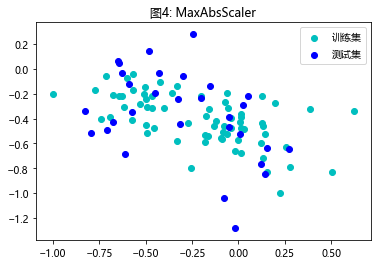

In [24]:
# 导入MaxAbsScaler预处理器
from sklearn import preprocessing
# 使用MinMaxScaler对样本的特征X进行数据预处理
scaler3 = preprocessing.MaxAbsScaler().fit(X_train)
X3_train = scaler3.transform(X_train)
X3_test = scaler3.transform(X_test)

# 给出样本两个特征的极值
print("训练集特征一的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X3_train[:,0]), np.min(X3_train[:,0])))
print("训练集特征二的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X3_train[:,1]), np.min(X3_train[:,1])))
print("测试集特征一的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X3_test[:,0]), np.min(X3_test[:,0])))
print("测试集特征二的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X3_test[:,1]), np.min(X3_test[:,1])))
# 绘制样本的散点图
plt.scatter(X3_train[:,0], X3_train[:,1], c='c', cmap=plt.cm.cool, label='训练集')
plt.scatter(X3_test[:,0], X3_test[:,1], c='b', cmap=plt.cm.cool, label='测试集')
plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']
plt.title('图4: MaxAbsScaler')
plt.legend()
plt.show()

**【结果分析】**

对比图1和图4，散点的位置和相对关系依然完全一样，但坐标轴的刻度范围再次发生了改变。对于训练集，所有的特征都分布在了[-1, 1]之间，并且只存在一个最大值（+1或-1）；而测试集由于是按照训练集的特征进行缩放，所以部分数据略微超出(或不足）$\pm 1$. 基于`MaxAbsScaler`的分布特性，它特别适用于那些分布特别接近于正态分布的样本。

### 1.4 RobustScaler

某些情况下，假如数据集中有**离群点**，我们可以使用`Z-Score`进行标准化，但是简单的去均值操作后的数据并不理想，因为异常点的特征往往在标准化之后便容易失去离群特征。同样，我们也可以采用`Max-Min`标准化来进行处理，但是会发生更严重的问题，如果离群点偏离较大时，当将离群点规范到单位长度时，其他数据点可能会被缩放到接近0，从而失去特征的显著性，致使模型的学习失效。

基于这些原因，我们可以使用 `RobustScaler `针对离群点做标准化处理，该方法对`数据中心化`和`数据的缩放`鲁棒性有更强的参数控制。

训练集特征一的最大值：1.53， 最小值：-1.65。
训练集特征二的最大值：1.21， 最小值：-2.01。
测试集特征一的最大值：0.84， 最小值：-1.30。
测试集特征二的最大值：2.27， 最小值：-2.95。


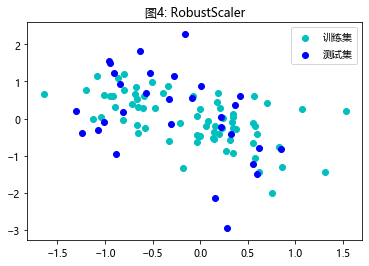

In [25]:
# 导入RobustScaler预处理器
from sklearn import preprocessing
# 对样本的特征X进行数据预处理
scaler4 = preprocessing.RobustScaler().fit(X_train)
X4_train = scaler4.transform(X_train)
X4_test = scaler4.transform(X_test)

# 给出样本两个特征的极值
print("训练集特征一的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X4_train[:,0]), np.min(X4_train[:,0])))
print("训练集特征二的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X4_train[:,1]), np.min(X4_train[:,1])))
print("测试集特征一的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X4_test[:,0]), np.min(X4_test[:,0])))
print("测试集特征二的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X4_test[:,1]), np.min(X4_test[:,1])))
# 绘制样本的散点图
plt.scatter(X4_train[:,0], X4_train[:,1], c='c', cmap=plt.cm.cool, label='训练集')
plt.scatter(X4_test[:,0], X4_test[:,1], c='b', cmap=plt.cm.cool, label='测试集')
plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']
plt.title('图4: RobustScaler')
plt.legend()
plt.show()

**【结果分析】**

对比图1和图5，散点的位置和相对关系完全一样，所不同的也只是坐标轴的刻度范围。

### 1.5 Normalizer

`Normalizer `是一个相对特殊的`正则化`方法，它将每个样本特征缩放到单位范数（即每个样本的范数为1）。此时，所有样本的特征向量的`欧式距离` $D_{Euclidean} = 1$。换句话说，数据分布变成一个半径为 1 的圆，或者是一个球（3维空间）。

`Normalizer`只保留了数据特征向量的`方向`，而忽略了向量的`大小`，这对于后面要使用二次型（点积）或其他核方法计算样本相似性的应用会非常有用，比如：文本分类、检索和聚类应用。例如，在检索中对两个`TF-IDF`倒排检索的特征向量的`L2-Norm`进行点积，求特征间的余弦相似性。

`Normalizer` 的主要思想是对每个样本计算其 `p-范数`，然后对该样本中每个元素除以该范数，这样的结果是使得每个处理后的样本的`p-范数`等于1，该类可以公式化为：

$${||x||}_p = (|x_1|^p + |x_2|^p + ... + |x_n|^p)^{1/p} $$

在sklearn库中，`Normalizer`的参数`p-norm`有三种取值，分别是${1, 2, \infty}$，相当于将`Normalizer`置于三种最简形：
- norm='l1': 1-范数，${||x||}_1 = |x_1| + |x_2| + ... + |x_n| $
- norm='l2': 2-范数，${||x||}_2 = (|x_1|^2 + |x_2|^2 + ... + |x_n|^2)^{1/2} $
- norm='max': $\infty$-范数，${||x||}_{\infty} = max(|x_1|,|x_2|,...,|x_n|) $

默认情况下，`Normalizer(norm='l2')`。下面给出代码示例。

训练集特征一的最大值：0.88， 最小值：-1.00。
训练集特征二的最大值：-0.07， 最小值：-1.00。
测试集特征一的最大值：0.39， 最小值：-1.00。
测试集特征二的最大值：0.74， 最小值：-1.00。


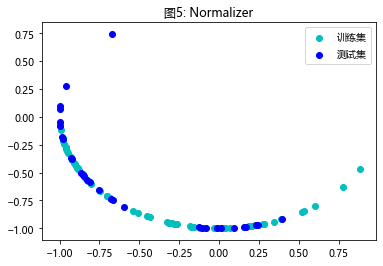

In [26]:
# 导入Normalizer预处理器
from sklearn import preprocessing
# 对样本的特征X进行数据预处理
scaler5 = preprocessing.Normalizer(norm='l2').fit(X_train)
X5_train = scaler5.transform(X_train)
X5_test = scaler5.transform(X_test)

# 给出样本两个特征的极值
print("训练集特征一的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X5_train[:,0]), np.min(X5_train[:,0])))
print("训练集特征二的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X5_train[:,1]), np.min(X5_train[:,1])))
print("测试集特征一的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X5_test[:,0]), np.min(X5_test[:,0])))
print("测试集特征二的最大值：{:.2f}， 最小值：{:.2f}。".format(np.max(X5_test[:,1]), np.min(X5_test[:,1])))
# 绘制样本的散点图
plt.scatter(X5_train[:,0], X5_train[:,1], c='c', cmap=plt.cm.cool, label='训练集')
plt.scatter(X5_test[:,0], X5_test[:,1], c='b', cmap=plt.cm.cool, label='测试集')
plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']
plt.title('图5: Normalizer')
plt.legend()
plt.show()

- 查看正则化器

In [27]:
scaler5

Normalizer(copy=True, norm='l2')

由上面的结果可以知道，我们可以通过修改norm的值来修改Normalizer正则化的方法，例如：Normalizer(copy=True, norm='max')可以将正则化方法设置为无穷范数($\infty$-范数)。

### 1.6 Binarizer

`特征二值化`是 **将数值特征用阈值过滤得到布尔值** 的过程。这对于下游的概率型模型是有用的，它们假设输入数据是多值 **伯努利分布(Bernoulli distribution)**。 `Binarizer` 可以实现将所有特征按照一个阈值进行二次赋值，大于等于阈值的特征设置为1，小于等于阈值的特征设置为0。这个过程可以公式化为：

$$ f(x) = 
\begin{cases}
1 & x > threshold \\
0 & x \leq threshold \\
\end{cases}
$$

In [12]:
from sklearn import preprocessing
import numpy as np
X = np.array([[ 1., -1.,  100.],
                    [ 0.6,  0.,  0.],
                    [ 0.5,  1., -1.]])
binarizer = preprocessing.Binarizer()
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [1., 1., 0.]])

- 查看正则化器

In [5]:
binarizer

Binarizer(copy=True, threshold=0.0)

- 重新设置阈值

In [10]:
from sklearn import preprocessing
import numpy as np
X = np.array([[ 1., -1.,  100.],
              [ 0.6,  0.,  0.],
              [ 0.5,  1., -1.]])
binarizer = preprocessing.Binarizer(threshold= 0.6)
binarizer.transform(X)

array([[1., 0., 1.],
       [0., 0., 0.],
       [0., 1., 0.]])

In [11]:
binarizer

Binarizer(copy=True, threshold=0.6)

### 1.7 通过数据预处理提高模型准确率

数据预处理的目的是让模型能够学到更具判别性的特征，从而提高模型的识别能力。因此，数据预处理通常会作为模型训练的前置工作。

训练模型前的数据处理一般包含两个步骤，1).数据清洗:让数据更干净，噪声数据更少（但不绝对）；2).数据预处理:让数据特征更具显著性，更容易被模型学到数据集内在的知识和信息。

下面给出一个例子，看看数据预处理对于模型性能究竟有多大的影响。此处，我们使用MLP多层神经网络来训练了Wine酒数据集。

In [1]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

wine = datasets.load_wine()
X_train, X_test, y_train, y_test  = train_test_split(wine.data, wine.target, random_state=62)
print(wine.data.shape, X_train.shape, X_test.shape)

(178, 13) (133, 13) (45, 13)


In [16]:
mlp = MLPClassifier(hidden_layer_sizes=[100,100], max_iter=2000, random_state=62)
# ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
mlp.fit(X_train, y_train)
print('原始数据，测试集得分：{:.4f}'.format(mlp.score(X_test, y_test)))

模型得分：0.9333


In [30]:
# 导入preprocessing预处理器
from sklearn import preprocessing

methods = ['StandardScaler', 'MinMaxScaler', 'MaxAbsScaler', 'RobustScaler', 'Normalizer', 'Binarizer']

for str in methods:
    scaler = eval('preprocessing.' + str + '().fit(X_train)')
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    mlp.fit(X_train_scaled, y_train)
    print('预处理方法: {}, 测试集得分: {:.4f}'.format(str, mlp.score(X_test_scaled,y_test)))

预处理方法: StandardScaler, 测试集得分: 1.0000
预处理方法: MinMaxScaler, 测试集得分: 1.0000
预处理方法: MaxAbsScaler, 测试集得分: 1.0000
预处理方法: RobustScaler, 测试集得分: 1.0000
预处理方法: Normalizer, 测试集得分: 0.9111
预处理方法: Binarizer, 测试集得分: 0.3778


**【结果分析】**

从结果来看，虽然只是`Wine`这样的简单的数据集 ，但是预处理仍然有较明显的效果，有四种方法都将模型在测试集上的正确率从0.9333提高到了 1. 这证明数据原始的特征形态对于模型训练是不够好的。但是从另外一个角度来看，`Normalizer`和`Binarizer`却让模型性能收到了损害，特别是`Binarizer`更是降低到了0.3778，这说明预处理方法并不总是有效。一方面，对于不同的数据集可能会需要不同的预处理方法；另一方面，并不是所有的预处理都对模型学习到更具判别性的特征起积极作用。

<font color='blue'>如何选择合适的预处理方法，这属于`经验主义`，但首先都需要对原始的数据集进行分析和研究，总结原始数据集的优点和缺点。</font>

<font style='color:red; font-weight:bold;'>值得注意的是：在实际应用中，数据预处理经常比使用更好的模型更重要。</font>

## 2. 数据降维

毫无疑问，始终贯穿本课程的一个难题是对数据和结果的`可视化`展示，这是因为无论是书本、PPT还是html都是二维的，而通常数据并不是如此。有时我们会显示三维图像或者只显示其相关特征（更多的时候显示的只是二维的图形），但是数据往往拥有超出显示能力的更多特征。事实上，数据显示还并非大规模特征下的唯一难题，对数据进行简化还有如下一系列的原因：
- 使得数据集更易使用
- 降低更多算法的计算开销
- 去除噪声
- 使得结果易懂

在`已标注`和`未标注`的数据上都有降维技术，这里我们将主要关注未标注数据上的降维技术，当然这些技术也可以被应用在已标注数据上。常见的降维数据主要有三种。
- **主成分分析（Principal Component Analysis, PCA）**。在PCA中数据从原来的坐标系转换到了`新的坐标系`，新坐标系的选择是由`数据`本身决定。第一个新坐标轴选择的是原始数据中`方差最大`的方向，第二个新坐标轴的选择和第一个坐标轴`正交且具有最大方差`的方向。该过程一直重复，重复次数为原始数据中特征的数目。我们会发现，大部分方差都包含在最前面的几个坐标轴中。因此，我们可以*忽略*余下的坐标轴，即实现对数据进行降维处理。
- **因子分析（Factor Analysis）**。在因子分析中，我们假设在观察数据的生成中有一些观察不到的`隐变量（latent variable）`。假设观察数据是这些`隐变量`和某些`噪声`的`线性组合`。那么隐变量的数据可能比观察数据特征的数目少，也就是说通过找到隐变量就可以实现数据的降维。因子分析被广泛应用在社会科学、金融和其他领域。
- **独立成分分析（Independent Component Analysis，ICA）**。ICA假设数据是从N个数据源生成的，这一点和因子分析有点相似。假设数据为多个数据源的混合观察结果，这些数据源之间在统计上是相互独立的，而在PCA中之假设数据是不相关的。同因子分析一样，如果数据源的数量少于观察数据特征的数量，则可以实现降维过程。

### 2.1 PCA主成分分析

---
- **优点**：减低数据的复杂性，识别最重要的多个特征。
- **缺点**：不一定需要，且可能损失有用信息。（需要丢弃一些方差不大的特征）
- **适用数据类型**：数值型数据。
---


#### 2.1.1 一个例子

假设我们想要去购买一辆汽车，但是汽车的属性总是很多：颜色、动力、扭矩、价格、品牌等，究竟如何选择才是最好的决策？假设我们只关注外观和动力这两个因素。我们可以用**图1**来显示这种需求。

![PCA0101](http://ouxinyu.cn/Teaching/MachineLearning/Attachments/Ch0901PCA0101.png)
<br/>**图1 汽车外观和动力对喜好的影响**

假设购车的是一个女孩子，而大多数时候，相比动力，女孩子更关注的是外观。所以在**图1**中，偏向外观的方向有更多的笑脸。

![PCA0102](http://ouxinyu.cn/Teaching/MachineLearning/Attachments/Ch0902PCA0102.png)
<br/>**图2 对数据点添加主成分标注**

基于这个需求，如**图2**所示，我们可以在图中添加一些标记，让数据点分布`最长`的方向标注为`成分1`，而与之**垂直**的方向标注为`成分2`。此时，我们可以设`成分2`的$取值 = 0$，而把`成分1`作为横坐标，重新绘制此图，得到了**图3**。

![PCA0103](http://ouxinyu.cn/Teaching/MachineLearning/Attachments/Ch0903PCA0103.png)
<br/>**图3 去掉成分2的数据集**

很令人惊讶的是，图中的表情散点从`一个平面`变成了`一条直线`。也就是说，`二维`的特征变成了`一维`，我们可以说，特征的维度降低了，即**降维**。

这种根据数据分布选取特征最密集方向的方法就称为**主成分分析(Principal Component Analysis, PCA)**。

#### 2.1.2 更严谨的分析
    
- **选择主成分**
    
考虑**图4**中的大量数据点。如果要求我们画出一条直线，这条直线要尽可能覆盖这些点，那么最长的线可能是哪一条？

<font color="blue">**没错!**</font>

`直线B`应该是最长的一条。在PCA中，我们需要对数据的坐标进行旋转，该旋转的过程与方向取决于数据的本身。我们需要将`第一条坐标轴`旋转到覆盖数据的`最大方差`位置，即图中的`直线B`。

> **数据的最大方差给出了数据最重要的信息。**

![PCA0201](http://ouxinyu.cn/Teaching/MachineLearning/Attachments/Ch0904PCA0201.png)
<br/>**图4 覆盖整个数据集的三条直线，其中直线B最长，并给出了数据集中差异化最大的方向**

在选择了覆盖数据`最大差异性`的坐标轴之后，我们还需要选择第二条坐标轴。假如该坐标轴与第一条坐标轴垂直，它就是覆盖数据`次大差异性`的坐标轴。这里更严谨的说法就是`正交（orthogonal）`。当然，在二维平面下，`垂直`和`正交`是一回事。在下图中，`直线C`就是第二条坐标轴，即和第一条坐标轴`正交`的坐标轴。

不难想象，如果主成分不只`2`个的话，那么我们还需要继续选择第三条坐标轴，第四条坐标轴。只不过第三条、第四条坐标轴需要在高维空间中进行选择。这需要一点空间想象力。

> **利用PCA，我们将数据坐标轴旋转到数据角度上的那些最重要的方向。**

- **降维**
    
上面已经实现坐标轴（主成分）的选择，接下来开始讨论降维。

坐标轴的旋转并没有减少数据的维度。在**图5**中，包含了三个不同的类别，要区分这三个类别可以使用`决策树`。我们应该还记得`决策树`每次都是基于一个特征来做决策的。我们可以在 *x* 轴上找到一些值，这些值能够很好地将这`3`个类分开。这样，我们就可以得到一些规则，比如当 $x<4$ 时，数据属于类别 0。如果使用`SVM`这样稍微复杂一点的分类器，我们应该会得到更好的分界面和分类规则，比如当 $(w_0 * x + w_1 * y + b) > 0$ 时，数据也属于类别 0。`SVM`可能比`决策树`得到更好的**分类间隔**，但是**分类超平面**却很难被解释。
    
![PCA0202](http://ouxinyu.cn/Teaching/MachineLearning/Attachments/Ch0905PCA0202.png)
<br/>**图5 二维空间的三个类别**

通过PCA进行降维处理，我们可以同时获得SVM和决策树的优点：
1. 得到了和决策树一样简单的分类器
2. 得到和SVM一样好的分类间隔

- **移动坐标轴**

如**图6**所示，其中的数据来自于**图5**，并经`PCA转换`之后绘制而成。`PCA降维`处理可以简单理解为：
1. 坐标轴原点置于`直线B`和`直线C`的交点上；
2. 然后将`直线B`作为`横坐标X轴`；
3. `C方向`的值设置为 0。

如果仅使用原始数据，那么这里的间隔会比决策树的间隔更大。另外，由于只需要考虑一维信息，因此数据就可以通过比`SVM`简单得多的、很容易采用的规则进行区分。在**图6**中，我们只需要一维信息即可，因为另一维信息只是对分类缺乏贡献的噪声数据。在二维平面下，这一点看上去微不足道，但是如果在高维空间下则意义重大。
    
![PCA0203](http://ouxinyu.cn/Teaching/MachineLearning/Attachments/Ch0906PCA0203.png)
<br/>**图6 二维空间的三个类别，在经过PCA处理后，被去掉一维，使得分类问题变得更容易处理**


### 2.2 对数据降维以便于进行可视化

下面以Wine酒数据集为例，展示一下数据降维的作用和意义。也许大家还记得，在过去适用Wine数据集的时候，我们常常只启用了样本的前两个特征。

```python
wine = datasets.load_wine()
X = wine.data[:, :2]
```

此处，我们将应用Wine样本的所有特征，不过我们还是先对样本进行降维。

#### - 数据载入及预处理

In [3]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

wine = datasets.load_wine()
X = wine.data
y = wine.target

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=16)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("原始数据的形态：训练集{}测试集{}".format(X_train.shape, X_test.shape))
print("预处理数据的形态：训练集{}测试集{}".format(X_train_scaled.shape, X_test_scaled.shape))
print("标签的形态：训练集{}测试集{}".format(y_train.shape, y_test.shape))

原始数据的形态：训练集(133, 13)测试集(45, 13)
预处理数据的形态：训练集(133, 13)测试集(45, 13)
标签的形态：训练集(133,)测试集(45,)


#### - PCA降维

In [4]:
from sklearn.decomposition import PCA
#设置主成分数量为2以便我们进行可视化
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(X_train_pca.shape, X_test_pca.shape)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#### - 可视化分析

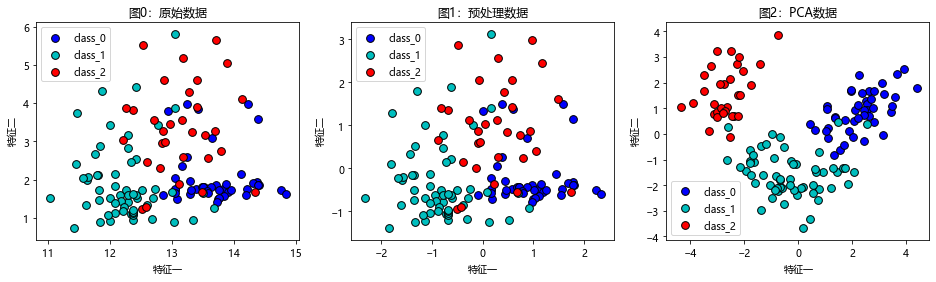

In [142]:
import matplotlib.pyplot as plt
import numpy as np
Xtrain = ['X_train', 'X_train_scaled', 'X_train_pca']
model = ['原始数据', '预处理数据', 'PCA数据']

plt.figure(figsize=(16,4))

for i in range(np.size(model)):
    # 酒数据集总共有三个类别，分别用0，1，2表示
    Class0 = eval(Xtrain[i] + '[y_train==0]')
    Class1 = eval(Xtrain[i] + '[y_train==1]')
    Class2 = eval(Xtrain[i] + '[y_train==2]')
    
    plt.subplot(1, 3, i+1)    
    plt.scatter(Class0[:,0],Class0[:,1],c='b',s=60,edgecolor='k')
    plt.scatter(Class1[:,0],Class1[:,1],c='c',s=60,edgecolor='k')
    plt.scatter(Class2[:,0],Class2[:,1],c='r',s=60,edgecolor='k')

    plt.legend(wine.target_names, loc='best')
    plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']
    plt.xlabel('特征一')
    plt.ylabel('特征二')
    plt.title('图' + str(i) + '：' + model[i])
    
plt.show()

**【结果分析】**

从上图可以看出，PCA之后的数据具有很明显的分界线，原始数据线性不可分的问题得到了缓解。

值得注意的是，图3中的数据展示的是数据样本的所有特征（变体），而图1和图2只展示了样本的前两个特征。

### 2.4 原始特征与PCA主成分之间的关系

下面我们用热度图来研究这2个主成分和其他成分之间的关系。

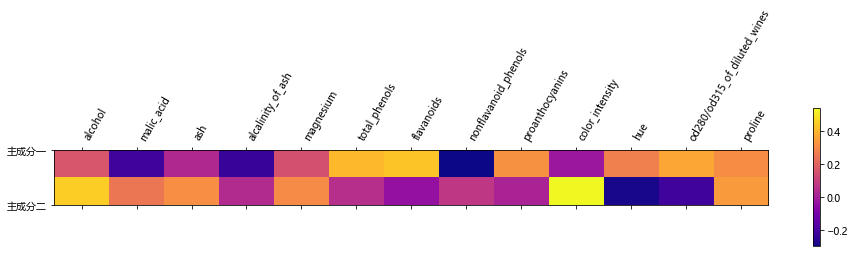

In [83]:
# 使用matshow绘制热度图
plt.matshow(pca.components_, cmap='plasma')
# 纵轴为主成分
plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']
plt.yticks([0,1], ['主成分一','主成分二'])
plt.colorbar()
# 横轴为原始特征
plt.xticks(range(len(wine.feature_names)),wine.feature_names,
          rotation=60,ha='left')
# 显示图像
plt.show()

**【结果分析】**

从热度图中，我们可以看出每个原始特征和主成分之间的关系。暖色表示正相关，冷色表示负相关。数值绝对值越大表示相关性越强。

至此，我们可以得到一个粗略的结论，主成分一相关度较大的是那些落在冷色调的区域；而主成分相关度较大的是那些落在暖色调区域的特征。不管如何，两个主成分基本上也覆盖了所有的原始特征。

### 2.5 性能分析与测试

下面我们考察一下不同数据层次的训练数据对于系统性能的影响。然后再考察一下主成分究竟是如何影响系统性能的。

#### - 不同层次的训练数据对性能的影响

In [84]:
# 定义一个MLP对数据进行拟合和分析
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=[100,100], max_iter=2000, random_state=16)

Xtrain = ['X_train', 'X_train_scaled', 'X_train_pca']
Xtest = ['X_test', 'X_test_scaled', 'X_test_pca']
model = ['原始数据', '预处理数据', 'PCA数据']

for i in range(3):
    mlp.fit(eval(Xtrain[i]), y_train)
    score_train = mlp.score(eval(Xtrain[i]), y_train)
    score_test = mlp.score(eval(Xtest[i]), y_test)
    print("{0}: 训练集得分 {1:.4f}，测试集得分 {2:.4f}".format(model[i], score_train, score_test))

原始数据: 训练集得分 0.9774，测试集得分 0.9556
预处理数据: 训练集得分 1.0000，测试集得分 1.0000
PCA数据: 训练集得分 1.0000，测试集得分 0.9333


**【结果分析】**

性能测试的结果已经很明显，预处理数据 > 原始数据 > PCA 数据。

回顾过去的两个模型：
```
决策树(树深 = 5)：训练集准确率：0.887，测试集准确率：0.911
KNN：训练集评分:1.00; 测试集评分:0.73
```

原始数据样本包含了13种特征，本例中的MLP在原始数据上获得了较好的性能，说明神经网络在大多数时候还是具有优势的，至少不会比常规机器学习算法差。

此外，我们发现`预处理`对于系统性能是有积极意义的，但是`PCA`后的数据性能有所下降，这主要原因是`PCA`丢弃了一些特征，导致信息损失。但是，同样值得注意的是，`PCA`之后的特征只保留了m (m<13)个特征，这意味着，如果我们需要在存储介质中保存样本的特征，那么只需要*2/13*的磁盘空间。同样在进行计算的时候，也只需要计算2个特征即可，这大大简化了计算的复杂性。

#### - 主成分对性能的影响

下面我们研究一下主成分对性能的影响，换句话说，什么样的情况下`PCA`不会让性能有明显下降。这里最重要的一个参数是`n_components`，该参数确定了在进行`PCA`降维的时候究竟需要保留多少个主成分，同时也可以设置保留原特征的信息量。此处`n_components`有两种取值，当值为`整型(Int)`时，表示保留主成分的个数；当值为[0,1]的`浮点数`时，表示降维后保留原特征的信息百分比。

- 计算得分

In [1]:
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
# 定义一个MLP对数据进行拟合和分析
from sklearn.neural_network import MLPClassifier

# TODO: 1. 载入数据集
wine = datasets.load_wine()
X = wine.data
y = wine.target

# TODO: 2. 数据预处理
# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=16)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scoresA = np.zeros([3,13]) # 创建一个数组用于存储得分，第一列是特征数量
scoresB = np.zeros([3,13])
scoresA[0,:] = range(X.shape[1])
scoresB[0,:] = np.linspace(0.1, 0.99, num=13)

# 基于主成分个数
for i in range(X.shape[1]):
# TODO: 3. 进行PCA降维
    pca = PCA(n_components = i + 1)
    pca.fit(X_train_scaled)
    X_train_pca = pca.transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # TODO: 4.训练MLP模型
    mlp = MLPClassifier(hidden_layer_sizes=[100,100], max_iter=2000, random_state=16)
    mlp.fit(X_train_pca, y_train)
    
    score_train = mlp.score(X_train_pca, y_train)
    score_test = mlp.score(X_test_pca, y_test)
    scoresA[1, i] = score_train
    scoresA[2, i] = score_test
    print("n_components={0}: 训练集得分 {1:.4f}，测试集得分 {2:.4f}".format(i+1, score_train, score_test))

print('')
# 基于信息量百分比
n = 0    
for i in scoresB[0,:]:
# TODO: 3. 进行PCA降维
    pca = PCA(n_components = i)
    pca.fit(X_train_scaled)
    X_train_pca = pca.transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # TODO: 4.训练MLP模型
    mlp = MLPClassifier(hidden_layer_sizes=[100,100], max_iter=2000, random_state=16)
    mlp.fit(X_train_pca, y_train)
    
    score_train = mlp.score(X_train_pca, y_train)
    score_test = mlp.score(X_test_pca, y_test)
    scoresB[1, n] = score_train
    scoresB[2, n] = score_test
    print("n_components={0:.2f}: 训练集得分 {1:.4f}，测试集得分 {2:.4f}".format(i, score_train, score_test))

    n = n + 1


n_components=1: 训练集得分 0.8346，测试集得分 0.8889
n_components=2: 训练集得分 1.0000，测试集得分 0.9333
n_components=3: 训练集得分 1.0000，测试集得分 0.9556
n_components=4: 训练集得分 1.0000，测试集得分 0.9556
n_components=5: 训练集得分 1.0000，测试集得分 0.9556
n_components=6: 训练集得分 1.0000，测试集得分 1.0000
n_components=7: 训练集得分 1.0000，测试集得分 1.0000
n_components=8: 训练集得分 1.0000，测试集得分 1.0000
n_components=9: 训练集得分 1.0000，测试集得分 1.0000
n_components=10: 训练集得分 1.0000，测试集得分 1.0000
n_components=11: 训练集得分 1.0000，测试集得分 1.0000
n_components=12: 训练集得分 1.0000，测试集得分 0.9778
n_components=13: 训练集得分 1.0000，测试集得分 1.0000

n_components=0.10: 训练集得分 0.8346，测试集得分 0.8889
n_components=0.17: 训练集得分 0.8346，测试集得分 0.8889
n_components=0.25: 训练集得分 0.8346，测试集得分 0.8889
n_components=0.32: 训练集得分 0.8346，测试集得分 0.8889
n_components=0.40: 训练集得分 1.0000，测试集得分 0.9333
n_components=0.47: 训练集得分 1.0000，测试集得分 0.9333
n_components=0.55: 训练集得分 1.0000，测试集得分 0.9556
n_components=0.62: 训练集得分 1.0000，测试集得分 0.9556
n_components=0.69: 训练集得分 1.0000，测试集得分 0.9556
n_components=0.77: 训练集得分 1.0000，测试集得分 0.9556

- 绘制得分曲线图

**【结果分析】**

从测试集的得分可以看到，当 `n_components=6` 或 `n_components=0.84`时，模型的性能已经和`降维`之前一致。也就是说，大约不到特征数量**一半**的主成分即可实现使用*全部特征*才能获得的性能。这个结果有力地证明了`PCA`降维的有效性。基于这样的设置，我们在保证系统性能的同时，**节省了存储空间和系统资源**并**提高了系统的计算速度**。

Text(0.5, 1.0, '基于信息量百分比的性能对比图')

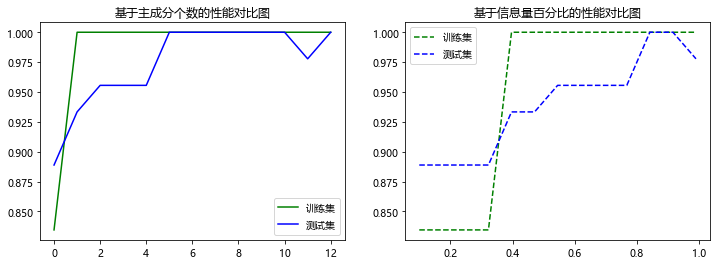

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']

plt.subplot(121)
plt.plot(scoresA[0,:], scoresA[1,:], 'g-', label='训练集（个数）')
plt.plot(scoresA[0,:], scoresA[2,:], 'b-', label='测试集（个数）')
plt.legend(['训练集', '测试集'], loc='best')
plt.title('基于主成分个数的性能对比图')

plt.subplot(122)
plt.plot(scoresB[0,:], scoresB[1,:], 'g--', label='训练集（信息量）')
plt.plot(scoresB[0,:], scoresB[2,:], 'b--', label='测试集（信息量）')
plt.legend(['训练集', '测试集'], loc='best')
plt.title('基于信息量百分比的性能对比图')


## 3. 特征提取

**特征表达（Feature Representation）**: 为了便于处理，将原始数据进行一定的变换，转换为易于处理的数据格式。

> <font color="blue">如何实现比较良好的数据表达？</font>

> <font color="blue">特征提取（Feature Extraction）</font>

在机器学习中，`特征提取`是非常重要的一个过程，选择合适的特征直接关系到后续分类器的判决能力。

<font color="red">值得注意的是，在深度学习中，一个非常重要的区别是，`特征选择`是由模型来完成。</font>



### 3.0 载入数据集

下面我们使用一个非常著名的人脸识别数据库LFW来完成后续的实验。

#### 3.0.1 LFW人脸数据集的简介

---
**LFW (Labled Faces in the Wild)人脸数据集**：是目前人脸识别的常用测试集，其中提供的人脸图片均来源于生活中的自然场景，因此识别难度会增大，尤其由于多姿态、光照、表情、年龄、遮挡等因素影响导致即使同一人的照片差别也很大。并且有些照片中可能不止一个人脸出现，对这些多人脸图像仅选择中心坐标的人脸作为目标，其他区域的视为背景干扰。LFW数据集共有13233张人脸图像，每张图像均给出对应的人名，共有5749人，且绝大部分人仅有一张图片。每张图片的尺寸为250X250，绝大部分为彩色图像，但也存在少许黑白人脸图片。

当然，在深度学习流行的今天，LFW数据集的识别率已经达到99.78%。

---

除了识别一张图片是谁意外，我们还有一个很重要的任务是判断两张给定的图像是否是同一个人，这个应用称之为**人脸验证**。

例如，机场、车站所使用的 人脸识别系统，实际上就是人脸验证系统，用来批判真实的人、身份证上的人、系统中的人三者是否是同一个人。



#### 3.0.2 LFW人脸数据集的安装

基本方法如下第3步所示，但是由于`lfw人脸识别数据集`服务器在国外，因此下载速度可能会很慢（甚至中断），所以建议按照如下步骤进行操作：
1. 下载数据集

> 方法一：链接：https://pan.baidu.com/s/1eySjV_1K2XYD5YYKCxiVEw   提取码：3wut

    或者
    
> 方法二：链接：https://ndownloader.figshare.com/files/5976015   
    
2. 将下载好的文件 `lfw-funneled.tgz`，复制到默认存储文件夹路径：

> C:\Users\用户名\scikit_learn_data\fw_home

如果文件夹不存在，可以先执行第三步一次

3. 使用以下语句载入和使用`lfw人脸识别数据集`
        
```python
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=20, resize=0.8)
```



### 3.1 基于PCA的特征提取

下面我们使用一个非常著名的人脸识别数据库LFW来验证PCA的作用。

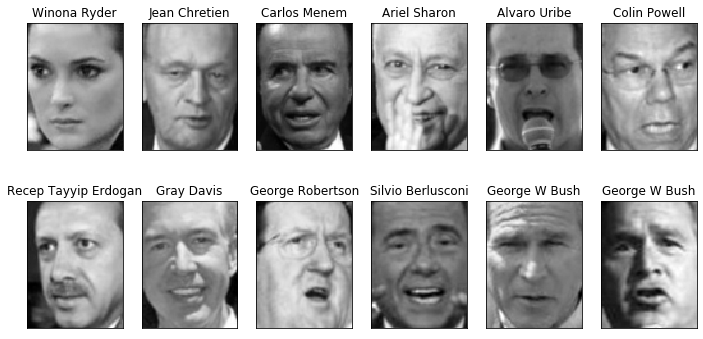

In [18]:
import matplotlib.pyplot as plt
# 导入数据集获取工具
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=20, resize=0.8)
# 获取图像的尺寸
image_shape = faces.images[0].shape

# 显示照片
fig, axes = plt.subplots(2,6,figsize=(12,6), subplot_kw={'xticks':(),'yticks':()})
for target,image,ax in zip(faces.target, faces.images, axes.ravel()):
    ax.imshow(image, cmap=plt.cm.gray) # 灰度模式显示
    ax.set_title(faces.target_names[target])
plt.show()

使用MLP神经网络模型训练LFW人脸识别数据集。

注意，图片的训练速度会比较慢。

> 本机的测试结果为：模型识别准确率:0.56 (175.17s)

In [17]:
# 导入MLP神经网络模型
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import time

start = time.time()

# faces.data/255将图像数据转换成[0,1]之间浮点数
X_train, X_test, y_train, y_test = train_test_split(faces.data/255, faces.target, random_state=62) 
mlp = MLPClassifier(hidden_layer_sizes=[100,100], random_state=62, max_iter=400, verbose=2)
mlp.fit(X_train, y_train)
print('模型识别准确率:{0:.2f} ({1:.2f}s)'.format(mlp.score(X_test, y_test), time.time()-start))

'''
执行结果：
型识别准确率:0.56 (175.17s)
'''

Iteration 1, loss = 4.17734643
Iteration 2, loss = 3.79034842
Iteration 3, loss = 3.66507548
Iteration 4, loss = 3.57811047
Iteration 5, loss = 3.51776817
Iteration 6, loss = 3.42587739
Iteration 7, loss = 3.35271100
Iteration 8, loss = 3.25618947
Iteration 9, loss = 3.15500014
Iteration 10, loss = 3.05108682
Iteration 11, loss = 2.97131366
Iteration 12, loss = 2.86311688
Iteration 13, loss = 2.81447134
Iteration 14, loss = 2.76734696
Iteration 15, loss = 2.63360422
Iteration 16, loss = 2.59159908
Iteration 17, loss = 2.55104996
Iteration 18, loss = 2.43341689
Iteration 19, loss = 2.36905584
Iteration 20, loss = 2.37874886
Iteration 21, loss = 2.28355529
Iteration 22, loss = 2.20668136
Iteration 23, loss = 2.16842091
Iteration 24, loss = 2.12851292
Iteration 25, loss = 2.06223846
Iteration 26, loss = 1.99503850
Iteration 27, loss = 2.00112958
Iteration 28, loss = 2.00790880
Iteration 29, loss = 1.93859390
Iteration 30, loss = 1.90721513
Iteration 31, loss = 1.91343137
Iteration 32, los

**【结果分析】**

此处，我们使用了两个节点为100的隐藏层，获得了0.56的准确率，也就是说错误率接近一半。但是能从5749个人中识别756(X_test.shape)并不是一件容易的事。而且仅仅只用了3分钟的时间，相信任何一个人想要做到这一步基本是很困难的。

当然，这个性能并不好，我们将尝试使用PCA降维来改进这个模型的性能。使用PCA降维，我们可以让原始数据的特征变得更容易被模型所理解。

前面，我们已经了解了如何使用PCA降低数据维度。在一些算法中还需要一个与之相关的预处理步骤，这个预处理过程称为**白化（Whiten）**。举例来说，假设训练数据是图像，由于图像中相邻像素之间具有很强的相关性，所以用于训练时输入是冗余的。`白化`的目的就是降低输入的`冗余性`；更正式的说，我们希望通过白化过程使得学习算法的输入具有如下性质：
1. 特征之间相关性较低；
2. 所有特征具有相同的方差。

In [46]:
from sklearn.decomposition import PCA

# 使用PCA白化功能处理人脸数据，并保留90%的信息
pca = PCA(whiten=True, n_components=0.9, random_state=62).fit(X_train)
X_train_whiten = pca.transform(X_train)
X_test_whiten = pca.transform(X_test)
# 输出PCA白化后的数据形态
print('数据形态：原始数据{}, PCA白化后{}'.format(X_train.shape, X_train_whiten.shape))

数据形态：原始数据(2267, 7500), PCA白化后(2267, 105)


In [47]:
start = time.time()
mlp = MLPClassifier(hidden_layer_sizes=[100,100], random_state=62, max_iter=400, verbose=0)
mlp.fit(X_train_whiten, y_train)
print('数据白化后模型识别准确率:{0:.2f} ({1:.2f}s)'.format(mlp.score(X_test_whiten, y_test), time.time()-start))

数据白化后模型识别准确率:0.57 (2.30s)


**【结果分析】**

同样的模型结构，但是准确率略微提高了1%，但是执行效率大大提高了，从原来的175.17s提高到2.19s，这主要得益于PCA白化减少了特征的维度，提高了计算效率。

值得注意的是：当我们保留更多的信息，即设置更高的`n_components`时，可能并不能直接提高模型的性能，这是因为当特征变多后，模型可能会产生欠拟合的问题。此时，可能需要更合理的调整模型结构。

### 3.2 基于非负矩阵分解的特征提取

**非负矩阵分解(Nonnegative Matrix Factorization)**，简称NMF，是由Lee和Seung于1999年在自然杂志上提出的一种矩阵分解方法，它使分解后的所有分量均为非负值(要求纯加性的描述)，并且同时实现非线性的维数约减。NMF的心理学和生理学构造依据是对整体的感知由对组成整体的部分的感知构成的(纯加性的)，这也符合直观的理解：整体是由部分组成的，因此它在某种意义上抓住了智能数据描述的本质．此外，这种非负性的限制导致了相应描述在一定程度上的稀疏性，稀疏性的表述已被证明是介于完全分布式的描述和单一活跃分量的描述之间的一种有效数据描述形式。

因为纯加性的和稀疏的描述能使对数据的解释变得方便(少量活跃的分量使数据的组成方式变得清晰)与合理(许多物理信号中不可能存在负饷成分)，还因为相对稀疏性的表示方式能在一定程度上抑制由外界变化(如：部分遮挡、光照变化和物体的旋转等)给特征提取带来的不利影响，所以NMF已逐渐成为信号处理、生物医学工程、模式识别、计算机视觉和图像工程等研究领域中最受欢迎的多维数据处理工具之一。具体说，它日前已被应用到文本分析与聚类、数字水印、人脸检测与识别、图像检索、图像复原、语言建模、声源分类、音乐信号分析与乐器识别、盲信号分离、网络安全、基因及细胞分析等的研究中。

![NMF](http://ouxinyu.cn/Teaching/MachineLearning/Attachments/Ch0907NMF.png)
<br/>**图7 非负矩阵分解NMF**

相对而言，PCA降维中的主成分的数量 N，是按照方差最大原则进行排序后选择 TopN 获得，选择不同数量的主成分，只需要调整TopN即可，不需要重复计算；而选择不同数量的NMF的分量时，都需要重新计算。此外，NMF中的成分没有顺序关系，不像PCA中的成分是按照方差大小顺序排列。

下面，我们测试在 LFW人脸识别数据集上测试NMF的作用。

In [58]:
from sklearn.decomposition import NMF

start = time.time()
nmf = NMF(n_components=105,random_state=62, verbose=0).fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
print('NMF处理后数据形态：{0}(执行时间：{1:.2f}s)'.format(X_train_nmf.shape, time.time() - start))

start = time.time()
mlp = MLPClassifier(hidden_layer_sizes=[100,100], random_state=62, max_iter=800, verbose=0)
mlp.fit(X_train_nmf, y_train)
print('nmf处理后模型准确率：{0:.2f}({1:.2f}s)'.format(mlp.score(X_test_nmf, y_test), time.time() - start))

'''
执行结果：
NMF处理后数据形态：(2267, 105)(执行时间：51.26s)
nmf处理后模型准确率：0.56(1580917388.83s)s
'''

NMF处理后数据形态：(2267, 105)(执行时间：51.26s)
nmf处理后模型准确率：0.56(1580917388.83)s


**【结果分析】**

从结果看，在同样的分量的情况下(n_components=105)，使用NMF和PCA处理后的数据可以获得基本一致的结果。说明同样维度下的特征性能大体上应该是相当的。

下面，我们适当增加n_components的数量，可以看到结果略微上升，这说明特征维度的增加使模型能够学到更具判别型的特征。但是，与PCA类似的是，继续增加特征也可能会使模型出现过拟合，同时也可能会增加噪声而影响模型的判断。

In [60]:
from sklearn.decomposition import NMF

start = time.time()
nmf = NMF(n_components=200,random_state=62, verbose=0).fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
print('NMF处理后数据形态：{0}(执行时间：{1:.2f}s)'.format(X_train_nmf.shape, time.time() - start))

start = time.time()
mlp = MLPClassifier(hidden_layer_sizes=[100,100], random_state=62, max_iter=800, verbose=0)
mlp.fit(X_train_nmf, y_train)
print('nmf处理后模型准确率：{0:.2f}({1:.2f}s)'.format(mlp.score(X_test_nmf, y_test), time.time() - start))

'''
执行结果：
NMF处理后数据形态：(2267, 200)(执行时间：157.65s)
nmf处理后模型准确率：0.58
'''

NMF处理后数据形态：(2267, 200)(执行时间：157.65s)
nmf处理后模型准确率：0.58(1580917792.53)s


# 二、聚类算法

**聚类（Clustering）**：根据在数据中发现的描述对象及其关系的信息，将数据对象分组(簇)。`聚类`的目标是，让组内的对象相互之间尽量相似，而不同组中的对象尽量不同。同一组内相似性越大，组间差别越大，聚类就越好。

下面简要介绍三种聚类算法：
1. K均值聚类（K-Means）：基于原型的，划分的聚类技术，试图从全部数据对象中发现用户指定个数的簇。
2. 凝聚层次聚类：开始每个点各成一簇，然后重复的合并两个最近的簇，直到指定的簇个数。
3. DBSCAN：一种基于密度的聚类算法。

### 4.1 K均值聚类算法（K-Means）

#### 4.1.1 K-means算法简介

`K-means算法`是一种聚类算法，所谓聚类，即根据**相似性原则**，将具有*较高相似度*的数据对象划分至同一类簇，将具有*较高相异度*的数据对象划分至不同类簇。`聚类`与`分类`最大的区别在于，聚类过程为无监督*（没有标签 y）*过程，即待处理数据对象没有任何先验知识；而分类过程为有监督过程*（有标签 y）*，即存在有先验知识的训练数据集。

#### 4.1.2 K-means算法原理

`K-means`算法中的 *k* 代表类簇个数，*means* 代表类簇内数据对象的`均值`（这种均值是一种对类簇中心的描述），因此，`k-means`算法又称为`k-均值`算法。`k-means`算法是一种基于`划分`的聚类算法，以`距离`作为数据对象间相似性度量的标准，即数据对象间的距离越小，则它们的相似性越高，它们越有可能在同一个类簇。

数据对象间距离的计算有很多种，`k-means`算法通常采用**欧氏距离**来计算数据对象间的距离。算法详细的流程描述如下：
1. 随机选定n个聚类中心
2. 计算每个样本与这n个聚类中心的距离
3. 将样本划分至最近的聚类中心所在的类
4. 更新所有聚类中心，并计算误差
5. 重新迭代执行2-4

- 生成数据

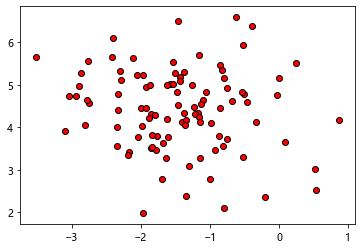

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
blobs = make_blobs(random_state=1, centers=1)
X_blobs = blobs[0]
plt.scatter(X_blobs[:,0],X_blobs[:,1],c='r',edgecolor='k')
plt.show()

- 使用K-Means进行聚类

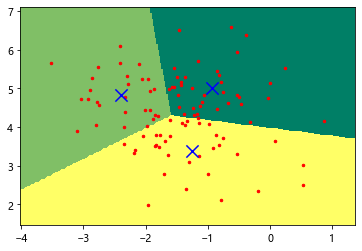

In [27]:
import numpy as np
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_blobs)

#下面是用来画图的代码
x_min, x_max = X_blobs[:, 0].min()-0.5 , X_blobs[:, 0].max()+0.5 
y_min, y_max = X_blobs[:, 1].min()-0.5 , X_blobs[:, 1].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),  np.arange(y_min, y_max, .02))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
# 绘制背景底色
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.summer,
           aspect='auto', origin='lower')
# 绘制离散点
plt.plot(X_blobs[:, 0], X_blobs[:, 1], 'r.', markersize=5)

#绘制用蓝色叉号代表的聚类中心
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=150, linewidths=3, color='b', zorder=10)
plt.show()

In [13]:
# 打印KMeans聚类标签
print("K均值的聚类标签:\n{}".format(kmeans.labels_))

K均值的聚类标签:
[1 1 2 0 0 0 1 1 2 0 1 0 1 2 1 0 0 1 2 2 0 2 1 1 1 1 0 1 1 1 2 2 1 1 0 2 0
 2 1 2 0 1 1 2 0 0 0 1 2 1 2 1 0 2 0 1 2 0 0 1 0 2 0 1 2 0 2 2 1 0 0 1 0 0
 0 1 0 1 1 2 0 2 0 0 2 1 0 1 2 2 0 1 2 2 0 0 1 0 0 1]


**【结果分析】**

在本例中，我们指定了 `make_blobs(centers=1)` 使得生成的数据样本只有一个类别 {0}，所以所有的样本大体上是聚集在一起的。经过 `K-meas(n_clusters)` 的计算之后，样本被依据距离最近原则分配到了三个类中 {0,1,2}，其中蓝色的**<font style="color:blue;"> X </font>** 表示聚类中心。这意味着每个和聚类中心 $X_i$ 具有相同标签的样本都应该距离聚类中心 $X_i$ 有最近的距离。每个样本的类别标签都被保存在了变量`kmeans.labels_` 属性中。

在各种聚类算法中，`K-Means`聚类算法可以说是最简单，也最直接的算法，同时也是最常用的算法。但是对于比较复杂的数据集，`K-Means`就无法很好地工作了。

#### 4.1.3 k-means算法优缺点分析

- **优点**： 算法简单易实现； 
- **缺点**： 
    - 需要用户事先指定类簇个数； 
    - 聚类结果对初始类簇中心的选取较为敏感；
    - 容易陷入局部最优；
    - 在大规模数据集上收敛较慢

### 4.2 凝聚聚类算法

**凝聚**：算法初始时，将每个点作为一个簇，每一步合并两个最接近的簇。另外即使到最后，对于噪音点或是离群点也往往还是各占一簇的，除非过度合并。对于这里的`最接近`，有下面三种定义：
1. 单链(MIN):定义簇的邻近度为不同两个簇的两个最近的点之间的距离。
2. 全链(MAX):定义簇的邻近度为不同两个簇的两个最远的点之间的距离。
3. 组平均：定义簇的邻近度为取自两个不同簇的所有点对邻近度的平均值。

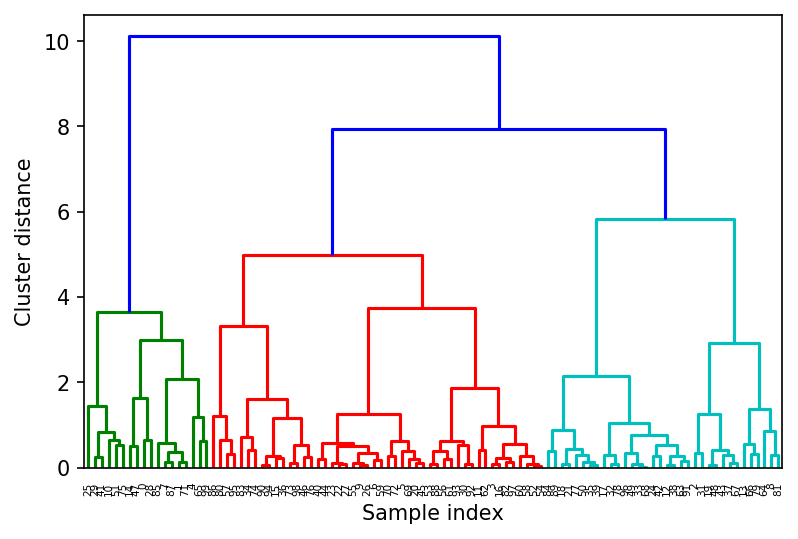

In [14]:
# 导入dedrogram和ward工具
from scipy.cluster.hierarchy import dendrogram, ward
# 使用连线方式进行可视化
linkage = ward(X_blobs)
plt.figure(dpi=150)
dendrogram(linkage)
ax = plt.gca()
# 设置坐标轴标签
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

**【结果分析】**

从上图中我们可以清晰地看到**凝聚聚类**算法的工作过程，它会逐层地将那些`距离最近`的样本进行合并，并到指定的类别数为止。所以，这种聚类方法也被称为**层次化聚类 Hierarchy Clustering**。与K-Means类似，凝聚聚类也无法很好处理复杂数据的聚类问题。

### 4.3 DBSCAN算法

**DBSCAN**：DBSCAN全称是基于密度的有噪声应用空间聚类（Density-based sppatial clustering of applications with noise），它是一种简单的、基于密度的聚类算法。DBSCAN使用了基于中心的方法，每个数据点的密度通过对以该点为中心以边长为 2eps 的网格(邻域)内的其他数据点的个数来度量。简单的说，它会通过对特征空间内的密度进行检测，密度大的地方DBSCAN认为是一个类，而密度相对较小的区域会认为存在一个分界线。基于这样的工作机制，DBSCAN算法不需要像K-Means和凝聚聚类算法一样，一开始指定聚类的数量n_clusters，而是根据算法的执行（依据密度参数eps和min_samples)自动确定类别的数量。

DBSCAN根据密度的不同，将数据点分为三类：
1. **核心点**：该点在邻域内的密度超过给定的阀值MinPs。
2. **边界点**：该点不是核心点，但是其邻域内包含至少一个核心点。
3. **噪音点**：不是核心点，也不是边界点。

有了以上对数据点的划分，聚合可以这样进行：各个`核心点`与其邻域内的所有`核心点`放在同一个簇中，把`边界点`跟其邻域内的某个`核心点`放在同一个簇中。

DBSCAN的重要参数有两类，一类是DBSCAN算法本身的参数，包括：eps, min_samplels；另一类是最近邻度量的参数，包括：metric, algorithm, leaf_size, p。
- **eps**: DBSCAN参数，ϵ-邻域的距离阈值，默认值0.5。eps过大，则更多的点会落在核心对象的ϵ-邻域，此时类别数可能会减少，本来不应该是一类的样本也会被划为一类；反之则类别数可能会增大，本来是一类的样本却被划分开。
- **min_samples**：BSCAN参数，样本点要成为核心对象所需要的ϵ-邻域的样本数阈值，默认值5，通常和eps一起调参。在eps一定的情况下，min_samples过大，则核心对象会过少，此时簇内部分本来是一类的样本可能会被标为噪音点，类别数也会变多；反之min_samples过小的话，则会产生大量的核心对象，可能会导致类别数过少。
- **metric**: 最近邻参数，用于度量距离的方法，例如：欧氏距离 、曼哈顿距离、切比雪夫距离、闵可夫斯基距离、马氏距离等。
- **algorithm**: 最近邻参数，求解距离的方法，包括蛮力搜索、KD树和K近邻。


下面，我们尝试使用DBSCAN完成聚类，并研究超参数对聚类效果的影响，我们做下面四种尝试 :
- 默认配置
- 增大领域距离阈值eps
- 增加核心对象领域的样本数要求min_samples
- 使用MinMaxScaler和StandardScaler进行预处理


#### 4.3.1 默认配置

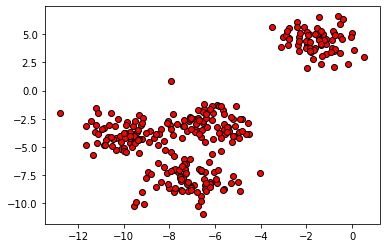

In [62]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
blobs = make_blobs(n_samples=300, random_state=1, centers=4)

X_blobs = blobs[0]
plt.scatter(X_blobs[:,0],X_blobs[:,1],c='r',edgecolor='k')
plt.show()

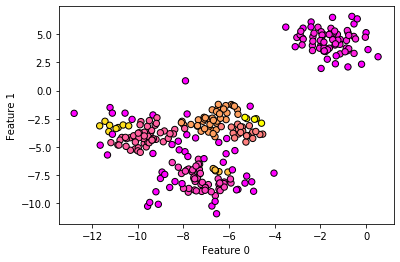

In [78]:
# 导入DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN()

# 使用DBSCAN拟合数据
clusters = db.fit_predict(X_blobs)

# 绘制散点图
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=clusters, cmap=plt.cm.spring, s=40, edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

显示DBSCAN模型的基本信息

In [58]:
print(db)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)


In [73]:
# 打印聚类标签
print("经过DBSCAN聚类后，总共有{}个类别".format(np.unique(clusters).size - 1))
print('聚类标签为：\n{}'.format(clusters))

经过DBSCAN聚类后，总共有8个类别
聚类标签为：
[ 0  1  0  0  0  1  0  1 -1  1  2  3  1  4  2  1  1  1  0 -1  2 -1  2  0
  0  1  4  4  2 -1  0  2  2  1  1  1  3  2  6 -1  2  1  0  1 -1  4 -1 -1
  0  1  4 -1 -1  4  3  1  3 -1  0  2  0  2  1 -1  4  0  0  1 -1  0 -1  3
  0  0 -1 -1  0  4  2  0 -1  2  2  2  0  3 -1  1  1  1  2  0 -1  2  2  4
  2  4  1  3  3  1 -1  4  7  5  2  4  1  2  0  1  1  2  2  1  1  1 -1  4
 -1  1 -1 -1  2  4  0  4  2  0  3 -1  2 -1  6  6  0  4  4 -1  1  2 -1  4
  2  0  4 -1 -1  3 -1  3  4  2  4  2  3  2  0  1  4  2  1  2  1  0  0  3
 -1  2  5  0  0  1  2  2  5  0  6  0 -1 -1  4  3  0  2 -1  2  0  0  0  7
  2 -1  2 -1  0  0  0  1  0  2  0 -1  4  3  2  1  4  2  7 -1  7  6 -1  1
 -1  0  4  0  3 -1  4  0 -1 -1 -1  0  3  0  1 -1  0 -1 -1  2  4  4  0  4
  6 -1  4 -1  4  2  3  1  2  7  0  2  0  1 -1  4  5  4 -1  4  6  2  1  3
 -1  1  4  0  0  2  2  1  4  0  5 -1  2  5  1 -1 -1  4 -1 -1 -1  4 -1  2
 -1 -1  4  4 -1 -1  0  1 -1  0  6  3]


**【结果分析】**

从上图中我们可以清晰地看到在默认情况下，DBSCAN产生了8个类{0,1,2,3,4,5,6,7}，甚至比原始的生成数据(centers=4)还要多4个，同时部分数据被作为噪声点排除在外{-1}。

#### 4.3.2 增大领域距离阈值

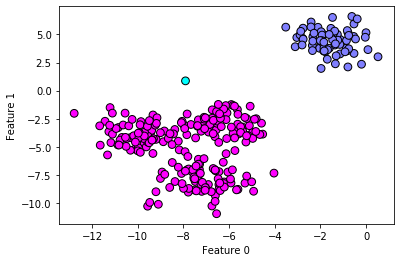

In [87]:
# 设置DBSCAN的eps参数为2
db_1 = DBSCAN(eps = 2)

# 重新拟合数据
clusters_1 = db_1.fit_predict(X_blobs)

# 绘制散点图
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=clusters_1, cmap=plt.cm.cool,
            s=60,edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [75]:
# 打印聚类标签
print("经过DBSCAN(eps = 2)聚类后，总共有{}个类别".format(np.unique(clusters).size - 1))
print('聚类标签为：\n{}'.format(clusters_1))

经过DBSCAN(eps = 2)聚类后，总共有8个类别
聚类标签为：
[ 0  1  0  0  0  1  0  1  0  1  1  1  1  1  1  1  1  1  0  1  1  0  1  0
  0  1  1  1  1  0  0  1  1  1  1  1  1  1  1  0  1  1  0  1  1  1  1  1
  0  1  1  1  1  1  1  1  1  1  0  1  0  1  1  1  1  0  0  1  1  0  1  1
  0  0  0  1  0  1  1  0  1  1  1  1  0  1  0  1  1  1  1  0  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  0  1
  0  1  1  1  1  1  0  1  1  0  1  1  1  1  1  1  0  1  1  1  1  1  1  1
  1  0  1  1  1  1  0  1  1  1  1  1  1  1  0  1  1  1  1  1  1  0  0  1
  0  1  1  0  0  1  1  1  1  0  1  0  1  1  1  1  0  1  0  1  0  0  0  1
  1 -1  1  0  0  0  0  1  0  1  0  1  1  1  1  1  1  1  1  1  1  1  0  1
  1  0  1  0  1  1  1  0  1  1  1  0  1  0  1  0  0  1  1  1  1  1  0  1
  1  1  1  0  1  1  1  1  1  1  0  1  0  1  0  1  1  1  1  1  1  1  1  1
  0  1  1  0  0  1  1  1  1  0  1  1  1  1  1  1  1  1  0  1  1  1  1  1
  1  1  1  1  1  1  0  1  1  0  1  1]


**【结果分析】**

通过增大超参数增大领域距离阈值eps，模型将更多（距离更远）的点合并到同一个聚类中心，因此部分类被合并了，所以只保留了2个类{0,1}。同时，由于领域增大了，所以没有再出现噪声点{-1}。

#### 4.3.3 增加核心对象领域的样本数要求

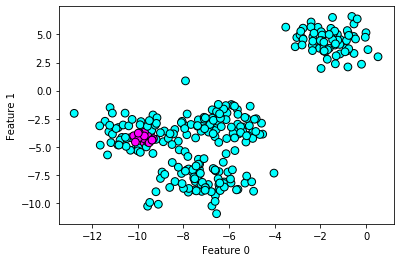

In [85]:
# 设置DBSCAN的min_samples参数为15
db_2 = DBSCAN(min_samples=15)

# 重新拟合数据
clusters_2 = db_2.fit_predict(X_blobs)

# 绘制散点图
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=clusters_2, cmap=plt.cm.cool,
            s=60,edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [86]:
# 打印聚类标签
print("经过DBSCAN(eps = 2)聚类后，总共有{}个类别".format(np.unique(clusters).size - 1))
print('聚类标签为：\n{}'.format(clusters_2))

经过DBSCAN(eps = 2)聚类后，总共有8个类别
聚类标签为：
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  0 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1
 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  0 -1 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


**【结果分析】**

随着核心对象领域的样本数要求min_samples的增加，能成为核心点的样本减少了，这导致聚类成为一个难点，所以噪声数量大幅上升，聚类的类别数也降低了。基于DBSCAN的特性，在实际应用中，经常会使用MinMaxScaler或者StandardScaler等方法进行预处理，因为它们可以预先把数据规范化到一个比较集中的范围。